<div>
<h1>Solve Xporters traffic volume problem</h1>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>
<figure><img src="./logo.jpg", width=300, border=20 style="float:left;margin:5px"></figure>
<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features


In [3]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
model_dir = './sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

In [5]:
from data_io import read_as_df
#data_dir = 'input_data'        # Change this to the directory where you put the input data
data_dir = './all_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!pwd
!ls $data_dir*

/Users/shuangruichen/Desktop/Mini Projet/Segway-master/starting_kit
xporters_feat.name      xporters_test.data      xporters_valid.data
xporters_private.info   xporters_train.data
xporters_public.info    xporters_train.solution


In [6]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /Users/shuangruichen/Desktop/Mini Projet/Segway-master/starting_kit/all_data/xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_metric
	time_budget = 1200
	feat_num = 59
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(38563, 59)
	Y_train = array(38563,)
	X_valid = array(4820, 59)
	Y_valid = array(0,)
	X_test = array(4820, 59)
	Y_test = array(0,)
feat_type:	array(59,)
feat_idx:	array(0,)



For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [7]:
data = read_as_df(data_dir  + '/' + data_name)             # The data are loaded as a Pandas Data Frame

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [8]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


In [9]:
# import all needed models
from data_io import write
from model import model
from sklearn import linear_model
from sklearn.metrics import r2_score as sklearn_metric
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_valid = D.data['X_valid']
X_test_para = X_train[0:5000]
Y_test_para = Y_train[0:5000]

In [25]:
'''
We have chosen 2 linear model, we know already our data are complete and 
influenced by multiple features. Then linear model won't have a big chance to suit such a case.
So we use these 2 models just for test our GridSearchCV code.
'''

# We choice alpha as most important parameter for all linear model according to obvious reasson 
# y = a*x + c

# Find best parameters for linear Ridge model
parameters = {'alpha':np.linspace(1,200,40)}
# As our data and result are all continuous numbers in R, so we didn't choice to normalize
classifier = linear_model.Ridge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for linear Ridge model:")
print(search.best_params_)

# Find best parameters for linear Lasso model
parameters = {'alpha':np.linspace(1,10,40)}
# We choice alpha as most important parameter for all linear model
classifier = linear_model.Lasso()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for linear Lasso model:")
print(search.best_params_)

# Find best parameters for Kernel Ridge Regression
parameters = {'alpha':np.linspace(300,400,10)}
classifier = KernelRidge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Kernel Ridge Regression:")
print(search.best_params_)

Best parameters for linear Ridge model:
{'alpha': 77.53846153846153}
Best parameters for linear Lasso model:
{'alpha': 5.384615384615385}
Best parameters for Kernel Ridge Regression:
{'alpha': 300.0}


In [32]:
'''
For Decision Tree Regressor or Random Forest Regressor, we believe the most important
paramter is the depth of the tree, and for others like nombres of estimator and criterion
don't influence that much under the case of our data.
'''
# Find best parameters for Decision Tree Regressor
parameters = {'max_depth':range(2,4),
              'criterion':("mse", "mae"), 
              'splitter':("best", "random"),
              'max_features':['auto', 'sqrt', 'log2'],
              'random_state':range(2,4)}
classifier = DecisionTreeRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Decision Tree Regressor:")
print(search.best_params_)

Best parameters for Decision Tree Regressor:
{'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'random_state': 2, 'splitter': 'best'}


In [33]:
parameters = {'random_state':range(1,3), 
              'max_depth':range(8,10)}
classifier = RandomForestRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Random Forest Regressor:")
print(search.best_params_)

Best parameters for Random Forest Regressor:
{'max_depth': 9, 'random_state': 2}


In [30]:
# Find best parameters for KNeighbors Regressor
'''
A trafic circumstance is usually complete. We don't think simply combine datas near each other 
in a euclidean space could suit such a problem, but our GridSearchCV do find a best number of neighbors
which we think is not enough pratical.
'''
parameters = {'n_neighbors':range(2,10)}
classifier = KNeighborsRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for KNeighbors Regressor:")
print(search.best_params_)

Best parameters for KNeighbors Regressor:
{'n_neighbors': 5}


In [36]:
# Find best parameters for Gradient Boosting Regressor
'''
We don't understand quite well of this model, we think this is a kind of gradient descent methode,
we are not sur our data can be described as a gardient desscent problems. But there might be a
fonction complete enough to suit our model. So we decide to give it a try.
'''
parameters = {'random_state':range(1,4)}
classifier = GradientBoostingRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Gradient Boosting Regressor:")
print(search.best_params_)

Best parameters for Gradient Boosting Regressor:
{'random_state': 1}


In [13]:
# Here we put all models analyed together to compare

'''
VotingRegressor means that three models combine together to predict a data. Here we chose 
'''

voter1 = GradientBoostingRegressor(random_state=1)
voter2 = RandomForestRegressor(random_state=2)
voter3 = DecisionTreeRegressor(random_state=2)

model_name = [
    'KNeighbors',
    'SVR',
    'GaussianProcess',
    'ElasticNet',
    'DecisionTree',
    'RandomForest',
    'GradientBoosting',
    'Voting - GB - DT',
    'Voting - GB - DT - RF',
    'Stacking - GB - DT - RF']

model_list = [                                                      
    KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(),random_state=0), 
    ElasticNet(random_state=0),
    DecisionTreeRegressor(random_state=2),
    RandomForestRegressor(max_depth=9, random_state=2),
    GradientBoostingRegressor(random_state=1),
    VotingRegressor(estimators=[('gb', voter1), ('lr', voter3)]),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)]),
    StackingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)])]

In [16]:
# Here we put all the best params for all Regressor
nb_data = 2000 # Insufficient computing power, so we take just 2000 samples
nb_model = len(model_list)
Perf_tr = np.zeros([nb_model,1])
for i in range(nb_model):
    model_list[i].fit(X_train[0:nb_data],Y_train[0:nb_data])
    Ytrain_predicted = model_list[i].predict(X_train[0:nb_data])
    Perf_tr[i] = sklearn_metric(Y_train[0:nb_data], Ytrain_predicted)
res = pd.DataFrame(columns=['model perf'],index=model_name)
for n,m in zip(model_name,Perf_tr):
    res.loc[n] = m
res.style.background_gradient(cmap='Blues')

,model perf
KNeighbors,0.707741
SVR,-0.001777
GaussianProcess,0.112257
ElasticNet,0.161813
DecisionTree,1.000000
RandomForest,0.972539
GradientBoosting,0.932471
Voting - GB - DT,0.983118
Voting - GB - DT - RF,0.987621
Stacking - GB - DT - RF,0.982578


In [17]:
# View the best model's result
best = model_list[7]
best.fit(X_train,Y_train)
Y_hat_train = best.predict(X_train)
np.vstack((Y_hat_train,Y_train))

array([[ 713.5347995 , 3922.67384864, 3485.72230632, ..., 6098.09631783,
        4049.555563  , 5054.22994805],
       [ 759.        , 4085.        , 3528.        , ..., 6591.        ,
        4366.        , 5240.        ]])

In [18]:
# test model from model.py
M = model()
trained_model_name = model_dir + data_name
!pwd
# Uncomment the next line to re-load an already trained model
print(trained_model_name)
#M = M.load(trained_model_name)
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_valid = D.data['X_valid']
if not(M.is_trained) : M.fit(X_train, Y_train)                     
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

/Users/shuangruichen/Desktop/Mini Projet/Segway-master/starting_kit
./sample_code_submission/xporters


<div>
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [19]:
# Save the trained model
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

./sample_result_submission/xporters_test.predict
./sample_result_submission/xporters_train.predict
./sample_result_submission/xporters_valid.predict


# <font color=#ff0000>Analysis</font>
## <font color=#ff0000>Model selection</font>
We have chosen 8 models, one of them is a Voting Regression which takes opinion from 3 others.
As you can see, our best model according to its model performance is the Decision Tree Regressor. But after cross-valide, we find it a bit overfitting (91%) so we decide to use Voting Regressor to neutralize it's overfitting by adding the opinion of Random Forest Regressor(similar principle) and Gradient Boosting Regressor(more mathematical for solving such a multi feature problem). And the result is satisfing. We gain a 4% improvement in the validation set<br><br>
## <font color=#ff0000>Best model principle</font>
The best model we chose is VotingRegressor, it averages the individual predictions to form a final prediction. Which is why we think this might neutralize the overfitting of the Decision Tree Regressor.<br>
As for why Decision Tree Regressor overfits, we think this might be caused by its own principle, because it tries to form a tree that exhaust every possible situation, that's why it gains 100% correction in Training set. But we don't want that because weather-traffic problem is not a problem of exhaustion. It's about choosing the most influential feature and judge on that. So that's why we think Gradient Boosting Regressor suits such a problem.<br><br>
## <font color=#ff0000>Hyperparameter</font>
We analyzed several hyperparameters like alpha in linear model, max depth in decision tree model, even random seed (just want to see how this could mislead the GridSearch). We find that for our model, there's not a big space for us to optimize the hyperparameters. Fist we didn't really dig into the algorithm of these model so we wouldn't know exactly where our hyperparameter works. But we do understand their basic function, we did use what GridSearch proposed us.<br>
We think for others, like more mathematical models, a huge amount of work about hyperparameter optimization is surly needed.<br><br>
## <font color=#ff0000>Cross-Valide</font>
Cross-Valide makes us reconsider how to choice a model without knowing its best hyperparameters and influences by the training set. The answer might be that we don't know. Decision Tree Regressor does have the best performance, and it's 100%, obviously we can't expect that for Validation set even test set. And our best hyperparameter might not fit the validation set or even the future usage. So even though we have GridSearch and other APIs that provide us a easier way, we might need a better way to find best model and best hyperparameters.<br><br>
## <font color=#ff0000>Futher improvement</font>
The range of parameters we use when we looks for the best parameters doesn't necessarily include best hyperparameters. And it suits only the training set, how do we make sure it's best for all sets?<br>
By analyzing the data, there are many irrelevant variables that we have not excluded. If we can filter the variables first, we might have more option on models and parameters.<br>

# Pre-processing + Model

In [20]:
# Model Imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [21]:
# Preprocessing Imports
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import LocalOutlierFactor

In [22]:
# Scoring fonction
score_dir = 'scoring_program/'
path.append(score_dir)
from libscores import get_metric
metric_name, scoring_function = get_metric()
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [23]:
# Model List
voter1 = GradientBoostingRegressor()
voter2 = RandomForestRegressor()
voter3 = DecisionTreeRegressor()

model_name = [
    'KNeighbors',
    'SVR',
    'GaussianProcess',
    'ElasticNet',
    'DecisionTree',
    'RandomForest',
    'GradientBoosting',
    'Voting - GB - DT',
    'Voting - GB - DT - RF']

model_list = [
    KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    GaussianProcessRegressor(), 
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(max_depth=9),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[('gb', voter1), ('lr', voter3)]),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)])]

In [24]:
def score_data(data_test,Y,data_name) :
    res = {}
    perf = []
    X = data_test
    for i in range(len(model_list)) :
        model = model_list[i]
        s = cross_val_score(model, X, Y, cv=5, scoring=make_scorer(scoring_function))
        s = s.mean(), s.std() * 2
        print('CV score for the', model_name[i], '= %0.2f (+/- %0.2f)' %s)
        res[data_name+' - '+model_name[i]] = s[0]
        if s[0]<0:
            perf.append(0)
        else:
            perf.append(round(s[0],3))
    print('\n')
    return res,perf

In [25]:
preprocessing_name = [
    'Raw data',
    'Remove Outliers',
    'PCA',
    'SVD',
    'TSNE'
]

# Shuffle data
shuffle = data.copy()
shuffle = shuffle.reindex(np.random.permutation(shuffle.index))
shuffle = shuffle.head(3000)
Y_raw = shuffle.iloc[:,-1]
print("Shuffle Complete")

# Remove Outliers
outliers = shuffle.copy()
outliers['outliers'] = pd.Series(LocalOutlierFactor(n_neighbors= 200).fit_predict(outliers), 
                                 index = outliers.index)
outliers = outliers[outliers['outliers'] == 1]
outliers = outliers.drop('outliers', 1)
Y = outliers.iloc[:,-1]
print("Remove Outlier Complete")

# Scaler
scaled_data = StandardScaler().fit_transform(outliers)
scaled_data = pd.DataFrame(scaled_data)
print("Scaler Complete")

# PCA
pca = PCA(n_components = 4).fit_transform(scaled_data)
pca = pd.DataFrame(pca)
print("PCA Complete")

# SVD
svd = TruncatedSVD(n_components=4).fit_transform(scaled_data)
svd = pd.DataFrame(svd)
print("SVD Complete")

# TSNE
tsne = TSNE().fit_transform(scaled_data)
tsne = pd.DataFrame(tsne)
print("TSNE Complete")

Shuffle Complete
Remove Outlier Complete
Scaler Complete
PCA Complete
SVD Complete
TSNE Complete


In [26]:
res = {}
perf = np.ones((5,9))

print('score - data original: ')
shuffle = shuffle.iloc[:,:-1]
r,p = score_data(shuffle, Y_raw, 'data original')
res.update(r)
perf[0] = np.array(p)

print('score - data no outliers: ')
outliers = outliers.iloc[:,:-1]
r,p = score_data(outliers, Y, 'data no outliers')
res.update(r)
perf[1] = np.array(p)

print('score - data of PCA: ')
r,p = score_data(pca, Y, 'data of PCA')
res.update(r)
perf[2] = np.array(p)

print('score - data of SVD: ')
r,p = score_data(svd, Y, 'data of SVD')
res.update(r)
perf[3] = np.array(p)

print('score - data of TSNE: ')
r,p = score_data(tsne, Y, 'data of TSNE')
res.update(r)
perf[4] = np.array(p)

score - data original: 
CV score for the KNeighbors = 0.52 (+/- 0.07)
CV score for the SVR = -0.00 (+/- 0.01)
CV score for the GaussianProcess = -2.75 (+/- 0.34)
CV score for the ElasticNet = -20.51 (+/- 82.64)
CV score for the DecisionTree = 0.85 (+/- 0.03)
CV score for the RandomForest = 0.93 (+/- 0.02)
CV score for the GradientBoosting = 0.91 (+/- 0.02)
CV score for the Voting - GB - DT = 0.91 (+/- 0.02)
CV score for the Voting - GB - DT - RF = 0.92 (+/- 0.02)


score - data no outliers: 
CV score for the KNeighbors = 0.52 (+/- 0.08)
CV score for the SVR = -0.01 (+/- 0.01)
CV score for the GaussianProcess = -2.76 (+/- 0.34)
CV score for the ElasticNet = 0.15 (+/- 0.08)
CV score for the DecisionTree = 0.87 (+/- 0.03)
CV score for the RandomForest = 0.93 (+/- 0.02)
CV score for the GradientBoosting = 0.91 (+/- 0.01)
CV score for the Voting - GB - DT = 0.91 (+/- 0.02)
CV score for the Voting - GB - DT - RF = 0.92 (+/- 0.02)


score - data of PCA: 
CV score for the KNeighbors = 0.56 (+/

In [27]:
print(max(res,key=res.get))

data no outliers - RandomForest


In [28]:
com_perf = pd.DataFrame(perf, columns=model_name, index=preprocessing_name)
com_perf = com_perf.round(2)
com_perf.round(2).style.background_gradient(cmap='Blues')

,KNeighbors,SVR,GaussianProcess,ElasticNet,DecisionTree,RandomForest,GradientBoosting,Voting - GB - DT,Voting - GB - DT - RF
Raw data,0.520000,0.000000,0.000000,0.000000,0.860000,0.930000,0.910000,0.910000,0.920000
Remove Outliers,0.520000,0.000000,0.000000,0.150000,0.870000,0.930000,0.910000,0.910000,0.920000
PCA,0.560000,0.010000,0.000000,0.080000,0.200000,0.540000,0.500000,0.470000,0.520000
SVD,0.550000,0.010000,0.000000,0.080000,0.190000,0.540000,0.510000,0.470000,0.520000
TSNE,0.800000,0.010000,0.000000,0.020000,0.660000,0.730000,0.550000,0.710000,0.760000


<div>
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [29]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: r2_metric


<div>
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [31]:
np.vstack((Y_hat_train,Y_train))

array([[ 684.76072485, 3981.47390984, 3464.3858651 , ..., 5968.9520705 ,
        4099.79696496, 5194.0510161 ],
       [ 759.        , 4085.        , 3528.        , ..., 6591.        ,
        4366.        , 5240.        ]])

In [32]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
# Here we think DecisionTreeRegressor might be the best option, but we can't still get a nice accuracy.
# We thought this might because we haven't found a better regressionor or it's because we havn't get a data from pre-processing groupe

Training score for the r2_metric metric = 0.9857
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

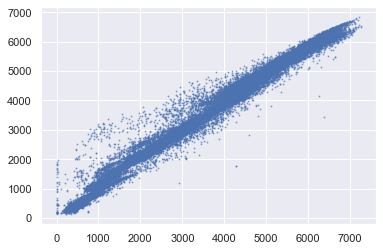

In [33]:
plt.scatter(Y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

<div>
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.94 (+/- 0.00)
